## Projeto - Aplicação de Redes Neurais

### Objetivo: O aluno deverá ser capaz de realizar uma análise completa dos dados e projetar uma rede neural para resolver problema. Avaliar os resultados obtidos através das métricas de classificação

### Problema: De posse de dados que correspondem a sinais de transitórios de eletrodomésticos (sinais obtidos em uma janela de 2s ao se ligar equipamento) e que foram rotulados em 7 diferentes classes, o aluno deverá realizar os seguintes passos: 

1) Carregar os dados e realizar a limpeza dos dados (se necessário)

2) Visualizar os dados para compreensão (dica: plotar 1 exemplo de cada Classe). Como na Figura 1 , abaixo, que representa um eletrodoméstico da Classe 1.
	 
3) Como é um problema muticlasse, o aluno deverá transformar os labels para uma representação correta.

4) Preparar os dados para se apresentados à ML 

5) Construir a rede neural com seus respectivos parâmetros (taxa de aprendizado, número de camadas intermediárias, número de neurônios, batch_size etc). O aluno deve propor uma estratégia para determinar esses parâmetros. 

6) Testar e validar os resultados 

7) Avaliar o usa de PCA (Análise de Componentes Principais) para visualização dos dados e também como speed-up da ML (para fins de classificação).

8) Conclusão 

obs.: Esses dados estão desatualizados, não necessariamente 
representam os eletrodomésticos atuais. Mas, esses estudos ainda são 
atuais e continuam usando recursos de IA em suas soluções. 

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

1) Carregar os dados e realizar a limpeza dos dados (se necessário)

In [6]:
file = 'db.csv'
df = pd.read_csv(file)
df


,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t191,t192,t193,t194,t195,t196,t197,t198,t199,Classes
0,24.00,24.00,23.00,25.00,24.00,25.00,24.00,24.00,22.00,25.00,...,1.00,-1.00,1.00,-1.00,1.00,0.00,1.00,0.00,0.00,1
1,23.00,23.00,22.00,21.00,21.00,22.00,23.00,23.00,22.00,21.00,...,-1.00,1.00,0.00,1.00,-1.00,0.00,-1.00,1.00,0.00,1
2,-0.55,-0.55,-0.55,3.45,13.45,11.45,18.45,18.45,20.45,20.45,...,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,1
3,12.30,10.30,15.30,15.30,16.30,15.30,17.30,16.30,17.30,15.30,...,-0.70,0.30,-0.70,0.30,-0.70,1.30,-0.70,1.30,-0.70,1
4,24.85,2.85,5.85,-1.15,2.85,-1.15,1.85,-1.15,0.85,-1.15,...,-0.15,0.85,-1.15,-0.15,-1.15,0.85,-0.15,0.85,-0.15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14.70,4.70,2.70,-0.30,0.70,0.70,2.70,1.70,1.70,0.70,...,-0.30,-0.30,-0.30,0.70,-0.30,0.70,-1.30,-1.30,-0.30,5
96,11.55,5.55,2.55,1.55,0.55,1.55,0.55,0.55,-0.45,0.55,...,0.55,-0.45,0.55,-1.45,0.55,-0.45,0.55,-0.45,0.55,6
97,14.35,4.35,1.35,2.35,-0.65,0.35,0.35,1.35,0.35,0.35,...,-0.65,0.35,-0.65,0.35,-1.65,0.35,0.35,0.35,-0.65,6
98,22.70,-5.30,-0.30,-5.30,-1.30,-3.30,-1.30,-3.30,-2.30,-3.30,...,-2.30,1.70,-1.30,1.70,-0.30,0.70,-2.30,0.70,-1.30,7


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 201 entries, t0 to Classes
dtypes: float64(200), int64(1)
memory usage: 157.2 KB


In [8]:
df.describe()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t191,t192,t193,t194,t195,t196,t197,t198,t199,Classes
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,11.114000,7.974000,8.154000,7.334000,7.374000,6.834000,7.134000,6.874000,7.054000,6.594000,...,0.114000,-0.14600,-0.146000,0.154000,0.014000,0.374000,-0.20600,-0.146000,-0.186000,3.140000
std,10.187807,9.012776,8.899937,8.958318,8.458134,8.301816,8.230796,8.317599,8.269182,7.937996,...,2.253057,0.86292,0.829497,1.009442,1.114779,0.969548,0.78757,1.046004,0.838411,1.608186
min,-10.150000,-6.300000,-6.300000,-6.300000,-5.300000,-3.500000,-4.300000,-6.300000,-6.300000,-4.300000,...,-2.500000,-2.40000,-2.050000,-2.500000,-2.150000,-2.500000,-2.30000,-2.500000,-2.050000,1.000000
25%,0.650000,0.450000,0.700000,0.450000,0.650000,0.450000,0.600000,0.850000,0.650000,0.650000,...,-0.700000,-0.75000,-0.700000,-0.550000,-0.800000,-0.100000,-0.70000,-0.750000,-0.700000,2.000000
50%,11.925000,5.575000,4.950000,4.300000,3.600000,3.050000,3.300000,3.325000,3.225000,3.850000,...,-0.300000,-0.07500,-0.200000,0.275000,-0.075000,0.400000,-0.32500,-0.025000,-0.275000,3.000000
75%,21.250000,14.900000,17.450000,16.950000,14.900000,13.000000,14.000000,13.000000,11.950000,10.950000,...,0.300000,0.45000,0.550000,0.700000,0.700000,0.850000,0.35000,0.450000,0.250000,4.000000
max,25.850000,25.450000,26.200000,25.200000,25.200000,25.000000,24.200000,25.200000,26.200000,25.200000,...,13.550000,1.70000,1.500000,2.650000,3.500000,3.800000,1.35000,1.850000,2.500000,7.000000


In [9]:
df.describe().loc['count'].unique() # Com isso é possivel verificar que não existem valores nulos

array([100.])

In [10]:
y = df.iloc[:,[-1]]
y

,Classes
0,1
1,1
2,1
3,1
4,2
...,...
95,5
96,6
97,6
98,7


In [11]:
X = df.iloc[:, 0:-1]
X

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t190,t191,t192,t193,t194,t195,t196,t197,t198,t199
0,24.00,24.00,23.00,25.00,24.00,25.00,24.00,24.00,22.00,25.00,...,-1.00,1.00,-1.00,1.00,-1.00,1.00,0.00,1.00,0.00,0.00
1,23.00,23.00,22.00,21.00,21.00,22.00,23.00,23.00,22.00,21.00,...,0.00,-1.00,1.00,0.00,1.00,-1.00,0.00,-1.00,1.00,0.00
2,-0.55,-0.55,-0.55,3.45,13.45,11.45,18.45,18.45,20.45,20.45,...,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55
3,12.30,10.30,15.30,15.30,16.30,15.30,17.30,16.30,17.30,15.30,...,0.30,-0.70,0.30,-0.70,0.30,-0.70,1.30,-0.70,1.30,-0.70
4,24.85,2.85,5.85,-1.15,2.85,-1.15,1.85,-1.15,0.85,-1.15,...,0.85,-0.15,0.85,-1.15,-0.15,-1.15,0.85,-0.15,0.85,-0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14.70,4.70,2.70,-0.30,0.70,0.70,2.70,1.70,1.70,0.70,...,0.70,-0.30,-0.30,-0.30,0.70,-0.30,0.70,-1.30,-1.30,-0.30
96,11.55,5.55,2.55,1.55,0.55,1.55,0.55,0.55,-0.45,0.55,...,-0.45,0.55,-0.45,0.55,-1.45,0.55,-0.45,0.55,-0.45,0.55
97,14.35,4.35,1.35,2.35,-0.65,0.35,0.35,1.35,0.35,0.35,...,0.35,-0.65,0.35,-0.65,0.35,-1.65,0.35,0.35,0.35,-0.65
98,22.70,-5.30,-0.30,-5.30,-1.30,-3.30,-1.30,-3.30,-2.30,-3.30,...,1.70,-2.30,1.70,-1.30,1.70,-0.30,0.70,-2.30,0.70,-1.30


In [12]:
X.columns = list(range(len(X.columns))) # alterando a nomeclatura das colunas
X.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,24.00,24.00,23.00,25.00,24.00,25.00,24.00,24.00,22.00,25.00,...,-1.00,1.00,-1.00,1.00,-1.00,1.00,0.00,1.00,0.00,0.00
1,23.00,23.00,22.00,21.00,21.00,22.00,23.00,23.00,22.00,21.00,...,0.00,-1.00,1.00,0.00,1.00,-1.00,0.00,-1.00,1.00,0.00
2,-0.55,-0.55,-0.55,3.45,13.45,11.45,18.45,18.45,20.45,20.45,...,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55
3,12.30,10.30,15.30,15.30,16.30,15.30,17.30,16.30,17.30,15.30,...,0.30,-0.70,0.30,-0.70,0.30,-0.70,1.30,-0.70,1.30,-0.70
4,24.85,2.85,5.85,-1.15,2.85,-1.15,1.85,-1.15,0.85,-1.15,...,0.85,-0.15,0.85,-1.15,-0.15,-1.15,0.85,-0.15,0.85,-0.15


In [13]:
df_copy = X.copy()
df_copy

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,24.00,24.00,23.00,25.00,24.00,25.00,24.00,24.00,22.00,25.00,...,-1.00,1.00,-1.00,1.00,-1.00,1.00,0.00,1.00,0.00,0.00
1,23.00,23.00,22.00,21.00,21.00,22.00,23.00,23.00,22.00,21.00,...,0.00,-1.00,1.00,0.00,1.00,-1.00,0.00,-1.00,1.00,0.00
2,-0.55,-0.55,-0.55,3.45,13.45,11.45,18.45,18.45,20.45,20.45,...,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55
3,12.30,10.30,15.30,15.30,16.30,15.30,17.30,16.30,17.30,15.30,...,0.30,-0.70,0.30,-0.70,0.30,-0.70,1.30,-0.70,1.30,-0.70
4,24.85,2.85,5.85,-1.15,2.85,-1.15,1.85,-1.15,0.85,-1.15,...,0.85,-0.15,0.85,-1.15,-0.15,-1.15,0.85,-0.15,0.85,-0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14.70,4.70,2.70,-0.30,0.70,0.70,2.70,1.70,1.70,0.70,...,0.70,-0.30,-0.30,-0.30,0.70,-0.30,0.70,-1.30,-1.30,-0.30
96,11.55,5.55,2.55,1.55,0.55,1.55,0.55,0.55,-0.45,0.55,...,-0.45,0.55,-0.45,0.55,-1.45,0.55,-0.45,0.55,-0.45,0.55
97,14.35,4.35,1.35,2.35,-0.65,0.35,0.35,1.35,0.35,0.35,...,0.35,-0.65,0.35,-0.65,0.35,-1.65,0.35,0.35,0.35,-0.65
98,22.70,-5.30,-0.30,-5.30,-1.30,-3.30,-1.30,-3.30,-2.30,-3.30,...,1.70,-2.30,1.70,-1.30,1.70,-0.30,0.70,-2.30,0.70,-1.30


In [14]:
df_copy['Classes'] = y

2) Visualizar os dados para compreensão (dica: plotar 1 exemplo de cada Classe). Como na Figura 1 , abaixo, que representa um eletrodoméstico da Classe 1.

In [15]:
df_copy.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Classes
0,24.00,24.00,23.00,25.00,24.00,25.00,24.00,24.00,22.00,25.00,...,1.00,-1.00,1.00,-1.00,1.00,0.00,1.00,0.00,0.00,1
1,23.00,23.00,22.00,21.00,21.00,22.00,23.00,23.00,22.00,21.00,...,-1.00,1.00,0.00,1.00,-1.00,0.00,-1.00,1.00,0.00,1
2,-0.55,-0.55,-0.55,3.45,13.45,11.45,18.45,18.45,20.45,20.45,...,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,1
3,12.30,10.30,15.30,15.30,16.30,15.30,17.30,16.30,17.30,15.30,...,-0.70,0.30,-0.70,0.30,-0.70,1.30,-0.70,1.30,-0.70,1
4,24.85,2.85,5.85,-1.15,2.85,-1.15,1.85,-1.15,0.85,-1.15,...,-0.15,0.85,-1.15,-0.15,-1.15,0.85,-0.15,0.85,-0.15,2


In [16]:
df_copy.loc[:,'Classes'].unique() # existem 7 classes diferentes

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [17]:
df_classes = df_copy.groupby('Classes').mean()
df_classes

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Classes,,,,,,,,,,,,,,,,,,,,,
1,13.306250,12.681250,15.931250,16.806250,17.931250,17.181250,17.681250,19.306250,20.931250,20.306250,...,0.056250,-0.443750,0.181250,-0.068750,0.306250,-0.318750,0.306250,-0.193750,0.431250,-0.318750
2,2.227273,1.045455,1.409091,0.318182,0.954545,0.409091,0.863636,0.409091,0.863636,0.136364,...,0.136364,0.136364,-0.045455,-0.136364,0.227273,-0.045455,0.136364,-0.318182,-0.045455,-0.045455
3,12.740000,12.006667,12.273333,11.073333,10.406667,9.606667,9.740000,8.873333,8.606667,8.073333,...,0.006667,0.940000,-0.393333,-0.193333,0.073333,0.206667,0.673333,-0.260000,-0.593333,-0.193333
4,8.550000,2.800000,4.300000,2.550000,3.800000,3.050000,4.550000,3.300000,4.050000,3.050000,...,0.550000,-0.450000,0.550000,-0.200000,0.050000,-0.950000,0.550000,-0.450000,0.800000,-0.450000
5,19.518750,12.018750,8.268750,7.518750,6.268750,6.018750,5.768750,5.768750,4.893750,4.893750,...,0.143750,-0.231250,-0.856250,0.143750,0.143750,0.393750,0.018750,0.268750,-0.606250,0.018750
6,12.950000,4.950000,1.950000,1.950000,-0.050000,0.950000,0.450000,0.950000,-0.050000,0.450000,...,-0.050000,-0.050000,-0.050000,-0.050000,-0.550000,-0.550000,-0.050000,0.450000,-0.050000,-0.050000
7,8.700000,-5.800000,-3.300000,-5.800000,-3.300000,-3.300000,-2.800000,-4.800000,-4.300000,-3.800000,...,1.200000,-1.300000,1.200000,-1.300000,0.700000,1.200000,1.200000,-1.300000,0.200000,-0.800000


In [18]:
# Supondo que 'df_classes' é o seu DataFrame

# Criar uma figura com subplots
fig = make_subplots(rows=7, cols=1, subplot_titles=[f'Classe {classe}' for classe in df_classes.index])

# Adicionar um gráfico de linha para cada classe
for i, classe in enumerate(df_classes.index):
    fig.add_trace(go.Scatter(x=df_classes.columns, y=df_classes.loc[classe], mode='lines', name=f'Classe {classe}'), row=i+1, col=1)

fig.update_layout(height=4000, width=800, title_text="Médias por Classe ao Longo do Tempo")
fig.show()



In [19]:
df = df_copy
df.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Classes
0,24.00,24.00,23.00,25.00,24.00,25.00,24.00,24.00,22.00,25.00,...,1.00,-1.00,1.00,-1.00,1.00,0.00,1.00,0.00,0.00,1
1,23.00,23.00,22.00,21.00,21.00,22.00,23.00,23.00,22.00,21.00,...,-1.00,1.00,0.00,1.00,-1.00,0.00,-1.00,1.00,0.00,1
2,-0.55,-0.55,-0.55,3.45,13.45,11.45,18.45,18.45,20.45,20.45,...,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,1
3,12.30,10.30,15.30,15.30,16.30,15.30,17.30,16.30,17.30,15.30,...,-0.70,0.30,-0.70,0.30,-0.70,1.30,-0.70,1.30,-0.70,1
4,24.85,2.85,5.85,-1.15,2.85,-1.15,1.85,-1.15,0.85,-1.15,...,-0.15,0.85,-1.15,-0.15,-1.15,0.85,-0.15,0.85,-0.15,2


3) Como é um problema muticlasse, o aluno deverá transformar os labels para uma representação correta.

In [20]:
# Supondo que 'labels' é um array com os rótulos das classes
labels = df['Classes'].values.reshape(-1, 1)  # Redimensionar para um array 2D

# Criar o codificador e transformar os rótulos
encoder = OneHotEncoder(sparse_output=False)  # sparse=False para retornar um array
labels_one_hot = encoder.fit_transform(labels)

In [21]:
len(labels_one_hot)

100

In [22]:
labels_one_hot

array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
 

In [23]:
# Separar as features e os rótulos
X = df.drop('Classes', axis=1).values  # Converter as features para um array numpy
y = labels_one_hot  # Já é um array numpy de rótulos one-hot

In [24]:
X[:5]

array([[24.  , 24.  , 23.  , 25.  , 24.  , 25.  , 24.  , 24.  , 22.  ,
        25.  , 24.  , 25.  , 23.  , 23.  , 23.  , 24.  , 24.  , 24.  ,
        23.  , 22.  , 20.  , 22.  , 20.  , 19.  , 15.  , 12.  ,  5.  ,
         2.  ,  0.  ,  0.  ,  0.  ,  1.  , -2.  ,  0.  , -2.  ,  1.  ,
         0.  ,  1.  , -2.  ,  0.  , -1.  ,  1.  , -1.  ,  0.  , -2.  ,
         0.  , -1.  ,  1.  ,  0.  ,  1.  , -1.  ,  0.  , -1.  ,  1.  ,
        -1.  ,  0.  , -1.  ,  1.  , -1.  ,  1.  ,  0.  ,  1.  , -1.  ,
         0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  , -1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  1.  ,  0.  ,  0.  , -1.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  1.  , -1.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  , -1.  ,
         0.  ,  0.  ,  1.  ,  0.  ,  1.  , -1.  ,  0.  , -1.  ,  1.  ,
        -1.  ,  1.  , -1.  ,  1.  , -1.  ,  1.  , -1.  ,  1.  , -2.  ,
         1.  , -1.  ,  1.  , -1.  ,  1.  , -1.  ,  1.  ,  0.  ,  1.  ,
      

In [25]:
y[:5]

array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.]])

4) Preparar os dados para se apresentados à ML 

In [26]:
# Agora vamos separar os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
# Normalizando os dados
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

5) Construir a rede neural com seus respectivos parâmetros (taxa de aprendizado, número de camadas intermediárias, número de neurônios, batch_size etc). O aluno deve propor uma estratégia para determinar esses parâmetros. 
6) Testar e validar os resultados 


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu'),  # Primeira camada oculta com 128 neurônios e função de ativação ReLU
    # Dense(128, activation='relu'),  # Segunda camada oculta com 64 neurônios
    # Dense(64, activation='relu'), 
    Dense(7, activation='softmax')  # Camada de saída com 7 neurônios (um para cada classe) e ativação softmax
])


In [29]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
history = model.fit(X_train, y_train,
                    epochs=70,
                    batch_size=1,
                    validation_split=0.1)  # Use parte dos dados de treino como validação


Epoch 1/70
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2587 - loss: 1.8725 - val_accuracy: 0.5000 - val_loss: 1.6535
Epoch 2/70
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8614 - loss: 0.6039 - val_accuracy: 0.6250 - val_loss: 1.2770
Epoch 3/70
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9190 - loss: 0.3912 - val_accuracy: 0.6250 - val_loss: 1.2439
Epoch 4/70
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9872 - loss: 0.1717 - val_accuracy: 0.7500 - val_loss: 1.1890
Epoch 5/70
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9746 - loss: 0.1903 - val_accuracy: 0.7500 - val_loss: 1.1761
Epoch 6/70
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9989 - loss: 0.0774 - val_accuracy: 0.6250 - val_loss: 1.1602
Epoch 7/70
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.1112 - val_accuracy: 0.7500 - val_loss: 1.1467
Epoch 8/70
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0583 - val_accuracy: 0.7500 - val_loss:

In [31]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.8000 - loss: 1.3108
Test accuracy: 0.800000011920929


7) Avaliar o usa de PCA (Análise de Componentes Principais) para visualização dos dados e também como speed-up da ML (para fins de classificação).


In [33]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [34]:
df_corr = pd.DataFrame(X)
corr = df_corr.corr()

<Axes: >

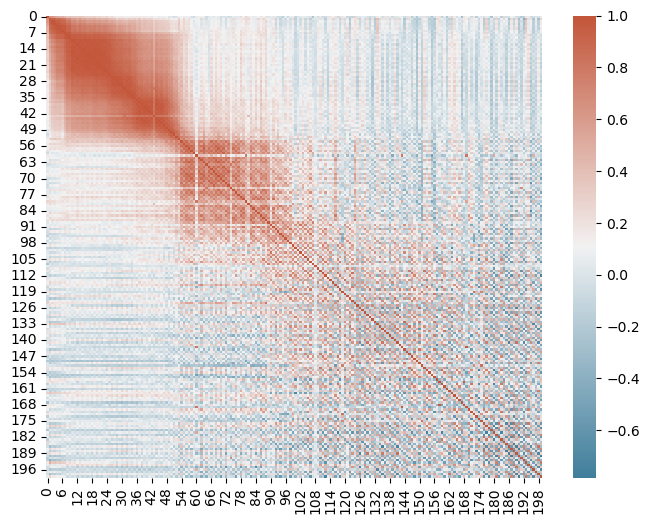

In [35]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.heatmap(corr, cmap=cmap, ax=ax)#, mask=mask)

In [38]:
def PlotaPCA(dfcorr, ncomponentes):
    pca = PCA(n_components=ncomponentes)
    pca.fit(dfcorr)
    variancia_explicada = pca.explained_variance_ratio_
    variancia_explicada_acumulada = np.cumsum(variancia_explicada)
    
    fig, ax = plt.subplots(figsize=(16, 8))
    
    # Plotando a variância explicada por cada componente principal
    ax.bar(range(1, int(ncomponentes) + 1), variancia_explicada, alpha=0.4, align='center', label='Individual explained variance')
    
    # Plotando a variância explicada acumulada
    ax.step(range(1, ncomponentes + 1), variancia_explicada_acumulada, where='mid', label='Cumulative explained variance', color='red')
    
    ax.set_xlabel('Components')
    ax.set_ylabel('Explained variance ratio')
    ax.set_title('PCA Explained Variance')
    ax.legend(loc='best')
    plt.grid(True)
    plt.show()

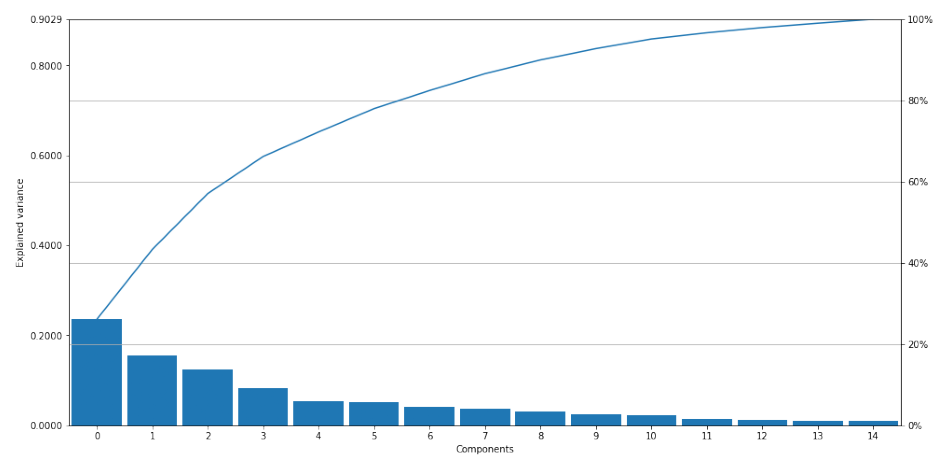

In [45]:
PlotaPCA(df_corr,0.9)

Podemos ver pelo gráfico que atingimos cerca de 90% de variância explicada usando 14 componentes. Aplicando a PCA nos conjuntos de treino e teste:


In [51]:
pca = PCA(n_components = 14)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [52]:
clf_PCA = model.fit(X_train_pca, y_train)
score_train_pca = model.score(X_train_pca, y_train)
score_test_pca = model.score(X_test_pca, y_test)
print('Score treino:',score_train_pca)
print('Score teste:',score_test_pca)

InvalidArgumentError: Graph execution error:

Detected at node StatefulPartitionedCall/sequential_1/dense_1/Relu defined at (most recent call last):
<stack traces unavailable>
Matrix size-incompatible: In[0]: [32,14], In[1]: [200,64]
	 [[{{node StatefulPartitionedCall/sequential_1/dense_1/Relu}}]] [Op:__inference_one_step_on_iterator_17923]

8) Conclusão 